# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('./Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initialising the RNN

In [11]:
rnn = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [12]:
rnn.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
rnn.add(Dropout(0.20))

c:\Users\MONSTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [13]:
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.20))

### Adding a third LSTM layer and some Dropout regularisation

In [14]:
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.20))

### Adding a fourth LSTM layer and some Dropout regularisation

In [15]:
rnn.add(LSTM(units = 50))
rnn.add(Dropout(0.20))

### Adding the output layer

In [16]:
rnn.add(Dense(units = 1))

### Compiling the RNN

In [18]:
rnn.compile(optimizer= 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [19]:
rnn.fit(X_train, y_train, epochs= 100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.0870
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0070
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0061
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0050
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0052
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0056
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0042
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0041
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0041
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0041
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0046
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0037
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0040
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0042
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [20]:
dataset_test = pd.read_csv('./Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [22]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [23]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
predicted_stock_price = rnn.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


### Visualising the results

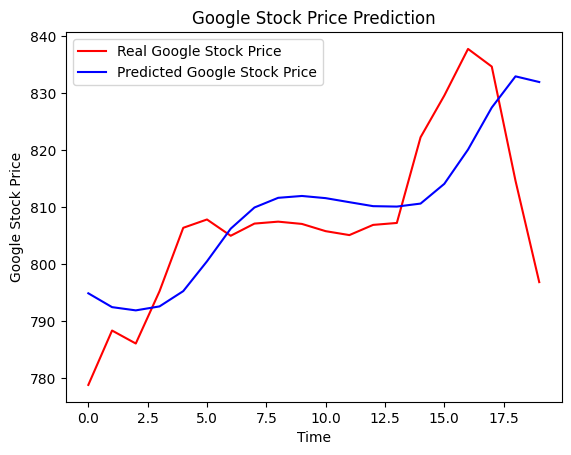

In [25]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [28]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

12.128984988341315